# Thesis Case Study - Optimizing Supervised Machine Learning Algorithms

### Predicting Readmission of Diabetic Patients after 30 days

This project is designed to demonstrate the likelihood of a diabetic patient to be readmitted within 30 days after treatment. Project Stage of Coding in Python using several machine learning classifiers to predict the readmission rates and length of stay of diabetic patients.

1. Dataset and Business Problem
2. Exploratory Analysis and Pre-processing
3. Feature Engineering
4. Model Building/Training/Validation
5. Modeling(Unbalanced Dataset Scenario)
6. Modeling(Balanced Dataset Scenario) before and after hyperparameter optimization
7. Findings and Limitations
8. Future Research Recommendations


# 1. Dataset and Business Problem of the Thesis

The clinical dataset used for the experiment covers 130 US hospitals for a period of 10 years (1999 - 2008). It contains patient encounter with clinicians and variables including the medications administered, readmission rates, length of stay, and inpatients over the period.    

Total Columns = 50,
Total Rows = 101766


##### FEATURE VARIABLES & DESCRIPTION

Patient identifiers: id, encounter_id, patient_nbr

Patient demographics: race, gender, age, weight, payer_code

Admission and Patient Discharge information: admission_source_id, admission_type_id, discharge_disposition_id

Patient Admission information: medical_specialty, diagnosis_1, diagnosis_2, diagnosis_3, time_in_hospital, number_diagnoses, num_lab_procedures, num_procedures, num_medications

Clinical Results: max_glu_serum, A1Cresult

Medication Details: change, diabetesMed, 24 features for diabetic medications for home usage

Readmission Rates: readmitted


1. Identification of factors that lead to the high readmission rate of diabetic patients within 30 days after discharge and to correspondingly predict the high-risk diabetic patients who are most likely to get readmitted

2. Identify the medications that are most effective for treatment

#### Model with Balanced Data before hyperparameter optimization






#### Model with Balanced Data with hyperparameter optimization



#### Findings

The following characteristics determine the patient's likelihood of being readmitted

Primary diagnosed disease linked with circulatory system

Patient is taking diabetes medication

High number of diagnoses

Patient is discharged for home health care or to alternate medical facility

High number of preceding year visits

Dosage of Insulin and merformin is not given to patient or low 

Secondary diagnosis to be diabetes

A1C test is not performed


#### Challenges 

Large Data

Several imputation techniques

Imbalance Dataset

Redundant Features

Acquisition of sufficient domain knowledge of the medical industry and diabetes was a major challenge

Hyperparameter tuning of all the models implemented using the three (3) programming languages selected.

#### Healthcare Business Recommendations

1. The financial plan for treatment and health care infrastructure should take into account the issues identified with hospital readmission rates and length of stay, as well as, dosage of drugs administered to outpatients

2. The most effective medications administered to diabetic patients are Metformin, Insulin, Glipizide


3. Current medications administered to high-risk patients should be reviewed and most effective medications be considered

4. Tracking and follow-up of discharge patients should be done to ensure wellness and counselling around maintaining a healthy lifestyle

5. Encourage improved health treatment and care to high-risk diabetic patients

6. Medical facilities can take precautionary measures with patients during their initial admission by making a1C and maximum glucose serum test compulsory and providing the treatment accordingly.

### Data loading dataset and required libraries

In [1]:
#importing required libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statistics import mode
import seaborn as sns
pd.options.display.max_columns = None
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
import time
from sklearn.pipeline import Pipeline
#import lightgbm as ltb


#import  Utilities.mypca as PCA
%matplotlib inline

# 2 Exploratory Data Analysis

In [2]:
#loading and displaying all the columns in the dataset
pd.options.display.max_columns=None

df = pd.read_csv(r"C:\Users\User\Documents\7151CEM Computing Individual Project Work\codebase\codebase\dataset_diabetes\diabetic_data.csv")
df.head(5)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
#display count of rows and columns
df.shape

(101766, 50)

In [4]:
df=df.replace('?', np.NaN)

In [5]:
df=df.dropna()

In [6]:
df.shape

(1043, 50)

From the above output, there are a total of `50` feature variables and over a `100000` samples in the dataset. 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1043 entries, 27068 to 101456
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              1043 non-null   int64 
 1   patient_nbr               1043 non-null   int64 
 2   race                      1043 non-null   object
 3   gender                    1043 non-null   object
 4   age                       1043 non-null   object
 5   weight                    1043 non-null   object
 6   admission_type_id         1043 non-null   int64 
 7   discharge_disposition_id  1043 non-null   int64 
 8   admission_source_id       1043 non-null   int64 
 9   time_in_hospital          1043 non-null   int64 
 10  payer_code                1043 non-null   object
 11  medical_specialty         1043 non-null   object
 12  num_lab_procedures        1043 non-null   int64 
 13  num_procedures            1043 non-null   int64 
 14  num_medications   

In [8]:
# #show data dimension after null values are dropped
# df.shape

In [9]:
#grouping of both categorical and numerical according to their data types contain

numeric_df=df.select_dtypes(include=np.number)
category_df=df.select_dtypes(include=np.object)

print('Total Numerical Columns:', str(len(numeric_df.columns)) + " Numerical Feature Variables")
print('Total Categorical Columns:', str(len(category_df.columns)) + " Categorical Feature Variables")


Total Numerical Columns: 13 Numerical Feature Variables
Total Categorical Columns: 37 Categorical Feature Variables


In [10]:
#checking for null values in the dataset
df.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [11]:
#displaying the names of columns
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [12]:
print(df.dtypes)

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [13]:
#checking for null values on both the categorical and numerical data columns
df.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [14]:
missing_values = {col: df[col][df[col] == '?'].count() for col in df.columns if df[col].dtype == object}

# Print the number of missing values in the dataset
for column, count in missing_values.items():
    print(column, count)

race 0
gender 0
age 0
weight 0
payer_code 0
medical_specialty 0
diag_1 0
diag_2 0
diag_3 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [15]:
percent_missing_value = {col: (df[col][df[col] == '?'].count() / len(df) * 100) for col in df.columns}

# Print the percentages
for column, percentage in percent_missing_value.items():
    print(column, percentage)

encounter_id 0.0
patient_nbr 0.0
race 0.0
gender 0.0
age 0.0
weight 0.0
admission_type_id 0.0
discharge_disposition_id 0.0
admission_source_id 0.0
time_in_hospital 0.0
payer_code 0.0
medical_specialty 0.0
num_lab_procedures 0.0
num_procedures 0.0
num_medications 0.0
number_outpatient 0.0
number_emergency 0.0
number_inpatient 0.0
diag_1 0.0
diag_2 0.0
diag_3 0.0
number_diagnoses 0.0
max_glu_serum 0.0
A1Cresult 0.0
metformin 0.0
repaglinide 0.0
nateglinide 0.0
chlorpropamide 0.0
glimepiride 0.0
acetohexamide 0.0
glipizide 0.0
glyburide 0.0
tolbutamide 0.0
pioglitazone 0.0
rosiglitazone 0.0
acarbose 0.0
miglitol 0.0
troglitazone 0.0
tolazamide 0.0
examide 0.0
citoglipton 0.0
insulin 0.0
glyburide-metformin 0.0
glipizide-metformin 0.0
glimepiride-pioglitazone 0.0
metformin-rosiglitazone 0.0
metformin-pioglitazone 0.0
change 0.0
diabetesMed 0.0
readmitted 0.0


In [16]:
#drop columns with high rate of missing values

df=df.drop(['weight', 'payer_code', 'medical_specialty'], axis=1)

In [17]:
#display statistical information of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
encounter_id,1043.0,1.832187e+08,8.819035e+07,88792836.0,117024951.0,153196488.0,228203574.0,439606454.0
patient_nbr,1043.0,7.141533e+07,3.121480e+07,89469.0,53382460.5,76494231.0,96891979.5,184274798.0
admission_type_id,1043.0,1.763183e+00,8.895351e-01,1.0,1.0,1.0,3.0,5.0
discharge_disposition_id,1043.0,2.465005e+00,2.552232e+00,1.0,1.0,1.0,3.0,18.0
admission_source_id,1043.0,4.288591e+00,2.883225e+00,1.0,1.0,6.0,7.0,17.0
time_in_hospital,1043.0,4.421860e+00,2.786446e+00,1.0,2.0,4.0,6.0,14.0
num_lab_procedures,1043.0,5.329818e+01,1.911076e+01,1.0,40.0,55.0,69.0,105.0
num_procedures,1043.0,1.721956e+00,1.861151e+00,0.0,0.0,1.0,3.0,6.0
num_medications,1043.0,1.630297e+01,7.526936e+00,1.0,11.0,15.0,20.0,58.0
number_outpatient,1043.0,1.423778e+00,2.105356e+00,0.0,0.0,1.0,2.0,15.0


In [18]:
df['encounter_id'].nunique()

1043

In [19]:
df['patient_nbr'].nunique()

996

In [20]:
df.drop(['encounter_id', 'patient_nbr'], axis=1, inplace=True)

In [21]:
df['race'].value_counts()

Caucasian          997
AfricanAmerican     32
Other               13
Asian                1
Name: race, dtype: int64

In [22]:
df['race'] = df['race'].replace('?', np.nan)

In [23]:
df['race'].unique()

array(['Caucasian', 'AfricanAmerican', 'Other', 'Asian'], dtype=object)

In [24]:
df['race']=df['race'].fillna(df['race'].mode()[0])

In [25]:
df['race'].value_counts()

Caucasian          997
AfricanAmerican     32
Other               13
Asian                1
Name: race, dtype: int64

In [26]:
df['gender'].value_counts()

Female    525
Male      518
Name: gender, dtype: int64

In [27]:
df['gender']=df['gender'].replace('Unknown/Invalid', np.nan)
df['gender'].dropna(inplace=True)

In [28]:
df['gender'].value_counts()

Female    525
Male      518
Name: gender, dtype: int64

In [29]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [30]:
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])

In [31]:
df['gender'].value_counts()

Female    525
Male      518
Name: gender, dtype: int64

In [32]:
df.replace('?', np.nan, inplace=True)

In [33]:
df.isnull().sum()

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide

In [34]:
df['age'].value_counts()

[70-80)     305
[60-70)     255
[50-60)     177
[80-90)     171
[40-50)      68
[30-40)      25
[90-100)     22
[20-30)      18
[0-10)        1
[10-20)       1
Name: age, dtype: int64

In [35]:
df['age'].unique()

array(['[70-80)', '[80-90)', '[60-70)', '[40-50)', '[50-60)', '[90-100)',
       '[20-30)', '[30-40)', '[0-10)', '[10-20)'], dtype=object)

In [36]:
df['age']=df['age'].replace({'[0-10)':5, '[10-20)':15, '[20-30)':25, '[30-40)':35, '[40-50)':45, '[50-60)':55, '[60-70)':65, '[70-80)':75, '[80-90)':85, '[90-100)':95})

In [37]:
df.age.value_counts()

75    305
65    255
55    177
85    171
45     68
35     25
95     22
25     18
5       1
15      1
Name: age, dtype: int64

In [38]:
df['admission_type_id'].value_counts()

1    562
3    312
2    168
5      1
Name: admission_type_id, dtype: int64

Based on the case study, we would be examining the readmission rate and length of stay in the hospital. The specific columns are 
`readmitted` and `time_in_hospital` columns

In [39]:
df['discharge_disposition_id'].value_counts()

1     689
6     180
3     123
5      16
13     10
11      7
4       5
18      5
7       4
2       4
Name: discharge_disposition_id, dtype: int64

In [40]:
df['discharge_disposition_id'].unique()

array([ 3, 11,  1,  6,  5,  7, 13,  4,  2, 18], dtype=int64)

In [41]:
df.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [42]:
df['time_in_hospital'].value_counts(sort=False)

10     17
6      85
2     174
3     209
4     169
1     102
5      96
11     16
8      50
7      62
14      5
9      30
12     15
13     13
Name: time_in_hospital, dtype: int64

In [43]:
df['num_lab_procedures'].unique()

array([ 65,  73,  58,  33,   5,  63,  75,  46,   1,  50,  45,  41,  47,
        61,  52,  70,  54,  59,  71,  69,   4,  66,  76,  53,  23,  44,
        72,  32,  79,  84,  62,  67,  60,  49,  21,  42,  86,  36,  27,
        80,  10,  51,  64,  68,  43,  55,  12,  56,  40,  77,  35,  25,
        22,  78,  57,  30,  82,  48,  38,  24,  81,   8,  29,  39,  31,
        34,  74,  28,  87,  18,  37,  16,  85,   7,  14,  20,  83,   2,
        93,  15,  92,  19,  11, 105,  13,  88,  26,  17,  89], dtype=int64)

In [44]:
df.max_glu_serum.value_counts()

None    1043
Name: max_glu_serum, dtype: int64

In [45]:
df['max_glu_serum']=df['max_glu_serum'].replace({"Norm":1, "None": 0, ">300":2, '>200':2})

In [46]:
df.max_glu_serum.value_counts()

0    1043
Name: max_glu_serum, dtype: int64

In [47]:
df['readmitted'].value_counts()

>30    478
NO     465
<30    100
Name: readmitted, dtype: int64

In [48]:
df['readmitted']=df['readmitted'].replace({'NO': 0, '<30':0, '>30':1})

In [49]:
df['readmitted'].value_counts()

0    565
1    478
Name: readmitted, dtype: int64

In [50]:
df['A1Cresult'].unique()

array(['None', 'Norm', '>8', '>7'], dtype=object)

In [51]:
df['A1Cresult'].value_counts()

None    935
>8       57
>7       26
Norm     25
Name: A1Cresult, dtype: int64

In [52]:
df['A1Cresult']=df['A1Cresult'].replace({"None":0, 'Norm':1, '>7':2, '>8':2})

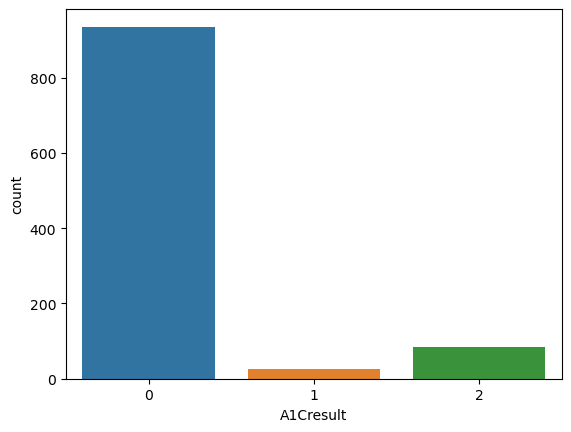

In [53]:
sns.countplot(df.A1Cresult)
plt.show()

In [54]:
df['gender']=df['gender'].replace({'Male':1, 'Female':0})

In [55]:
df['change'].value_counts()

No    746
Ch    297
Name: change, dtype: int64

In [56]:
df['change']=df['change'].replace({'Ch':1, 'No':0})

In [57]:
df['diabetesMed'].value_counts()

Yes    667
No     376
Name: diabetesMed, dtype: int64

In [58]:
df['diabetesMed']=df['diabetesMed'].replace({'Yes':1, 'No':0})


In [59]:
df['diabetesMed'].value_counts()

1    667
0    376
Name: diabetesMed, dtype: int64

In [60]:
df.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [61]:
drug=list(df.iloc[:, 16:39].columns)
drug

['number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin']

In [62]:
for i in drug:
    print(i, df[i].unique())

number_diagnoses [9 7 6 8 5 3 4]
max_glu_serum [0]
A1Cresult [0 1 2]
metformin ['No' 'Steady' 'Up' 'Down']
repaglinide ['No' 'Steady' 'Up']
nateglinide ['No' 'Steady']
chlorpropamide ['No']
glimepiride ['No' 'Steady' 'Down' 'Up']
acetohexamide ['No']
glipizide ['Steady' 'No' 'Up' 'Down']
glyburide ['No' 'Steady' 'Up' 'Down']
tolbutamide ['No']
pioglitazone ['No' 'Steady' 'Up' 'Down']
rosiglitazone ['No' 'Steady']
acarbose ['No' 'Steady']
miglitol ['No']
troglitazone ['No']
tolazamide ['No']
examide ['No']
citoglipton ['No']
insulin ['Steady' 'No' 'Down' 'Up']
glyburide-metformin ['No']
glipizide-metformin ['No']


<AxesSubplot:xlabel='change', ylabel='diabetesMed'>

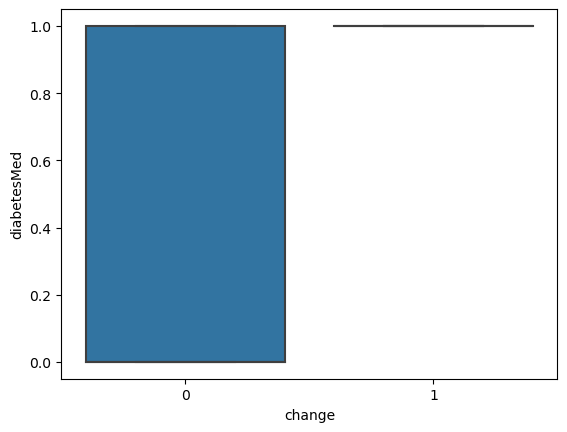

In [63]:
sns.boxplot(df['change'], df['diabetesMed'])

In [64]:
df['discharge_disposition_id'].value_counts()

1     689
6     180
3     123
5      16
13     10
11      7
4       5
18      5
7       4
2       4
Name: discharge_disposition_id, dtype: int64

<AxesSubplot:xlabel='num_procedures', ylabel='Density'>

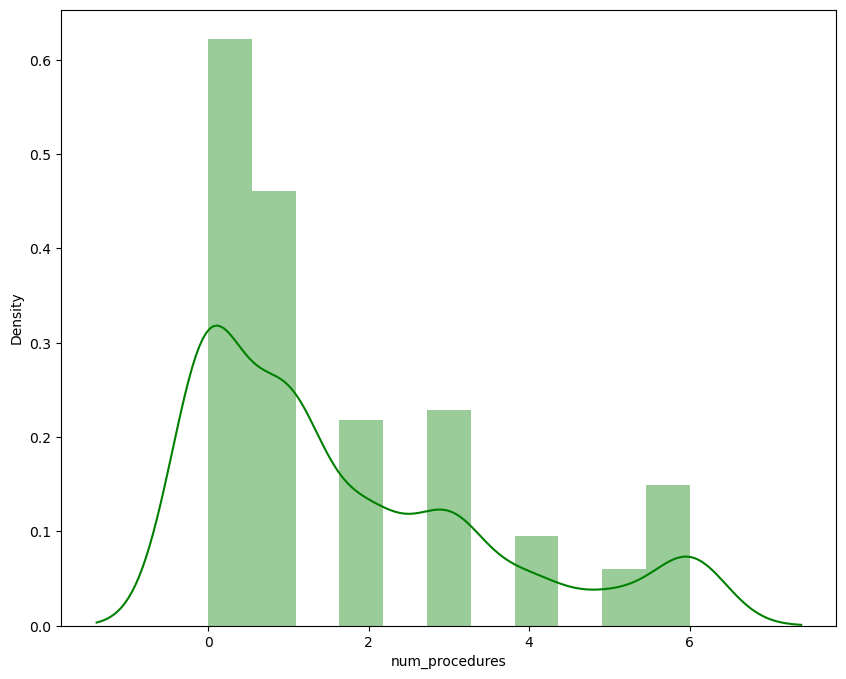

In [65]:
fig=plt.figure(figsize=(10, 8))
sns.distplot(df['num_procedures'], color='green')

<AxesSubplot:xlabel='num_lab_procedures', ylabel='Density'>

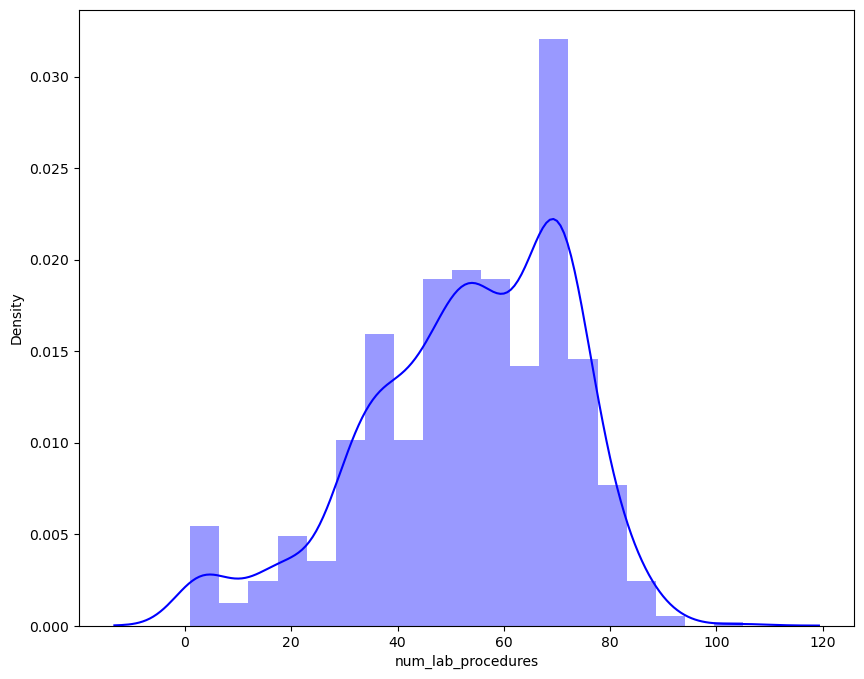

In [66]:
fig=plt.figure(figsize=(10, 8))
sns.distplot(df['num_lab_procedures'], color='blue')

number_diagnoses
AxesSubplot(0.125,0.11;0.775x0.77)


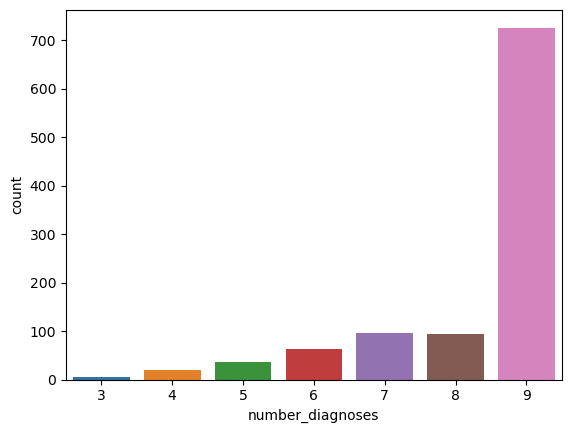

max_glu_serum
AxesSubplot(0.125,0.11;0.775x0.77)


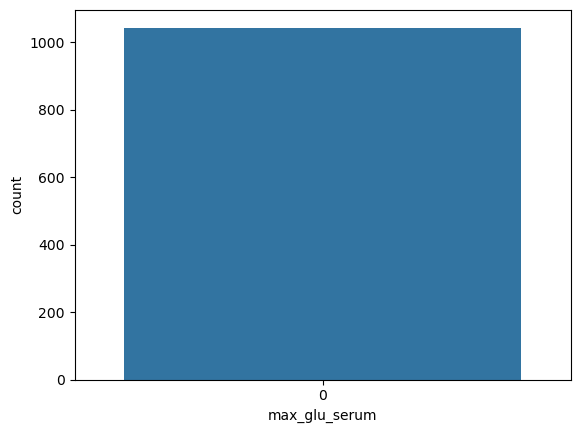

A1Cresult
AxesSubplot(0.125,0.11;0.775x0.77)


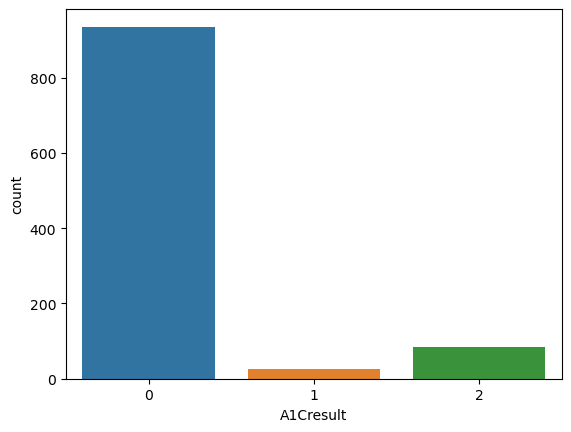

metformin
AxesSubplot(0.125,0.11;0.775x0.77)


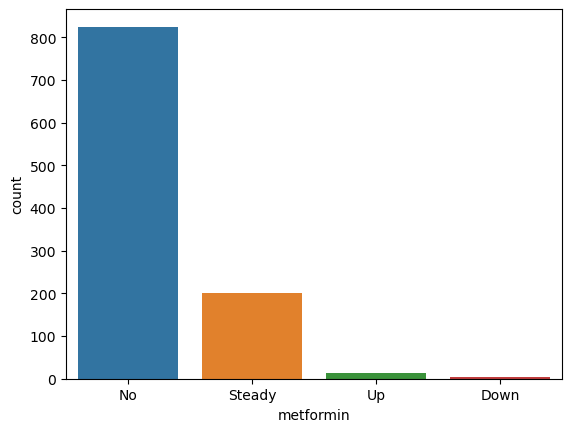

repaglinide
AxesSubplot(0.125,0.11;0.775x0.77)


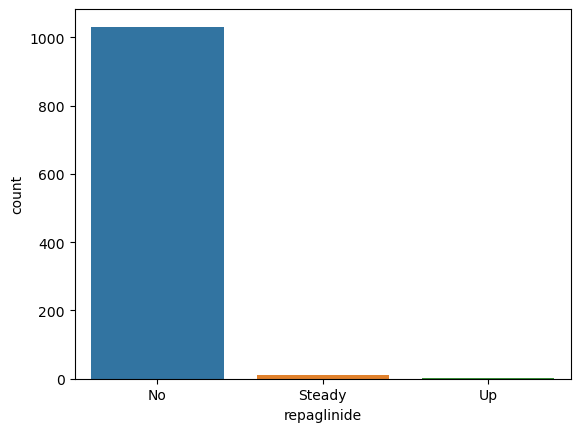

nateglinide
AxesSubplot(0.125,0.11;0.775x0.77)


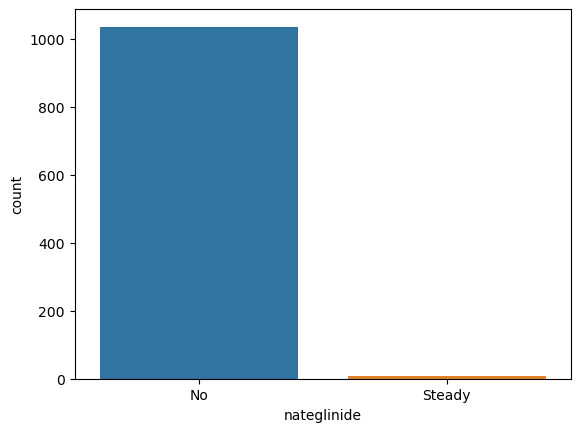

chlorpropamide
AxesSubplot(0.125,0.11;0.775x0.77)


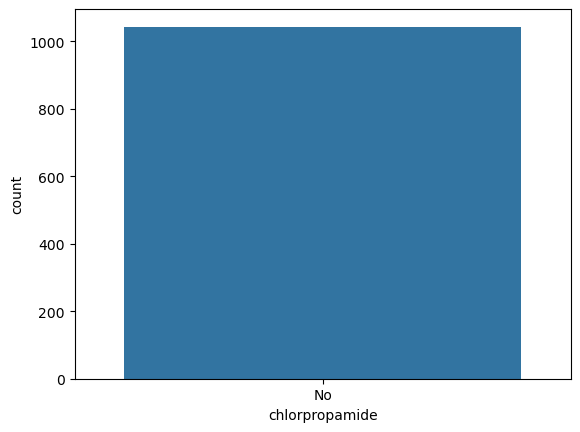

glimepiride
AxesSubplot(0.125,0.11;0.775x0.77)


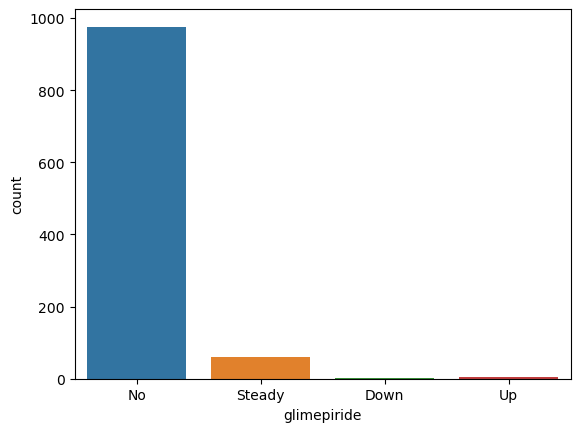

acetohexamide
AxesSubplot(0.125,0.11;0.775x0.77)


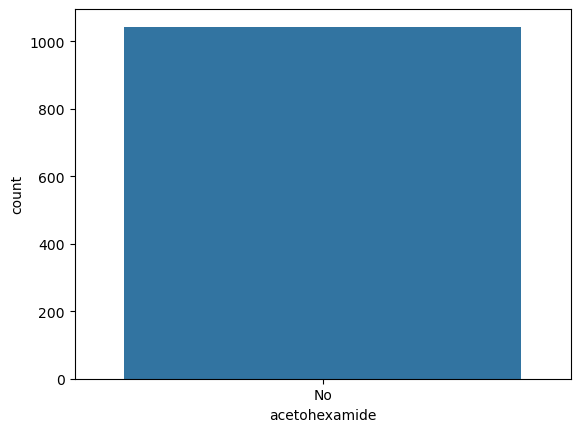

glipizide
AxesSubplot(0.125,0.11;0.775x0.77)


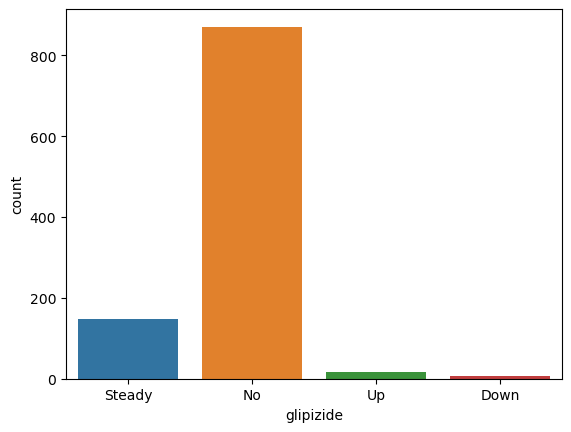

glyburide
AxesSubplot(0.125,0.11;0.775x0.77)


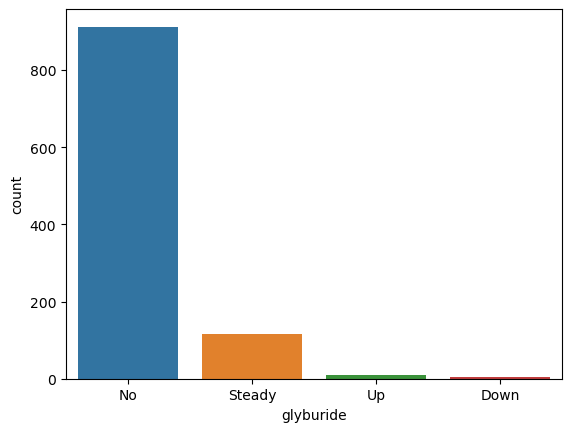

tolbutamide
AxesSubplot(0.125,0.11;0.775x0.77)


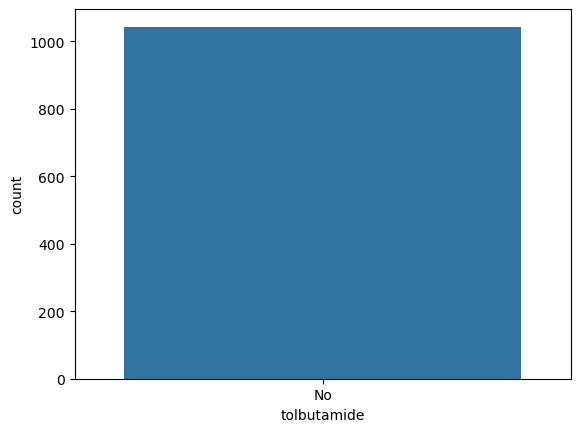

pioglitazone
AxesSubplot(0.125,0.11;0.775x0.77)


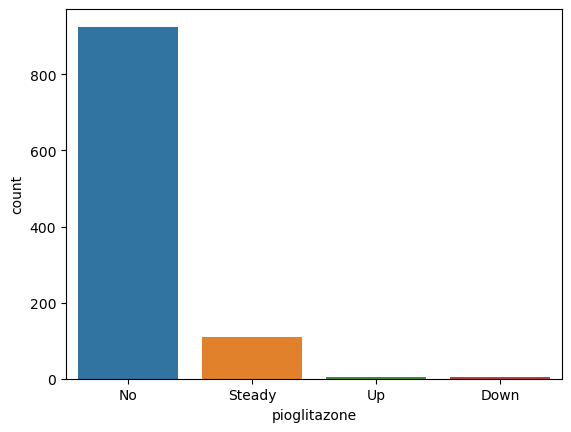

rosiglitazone
AxesSubplot(0.125,0.11;0.775x0.77)


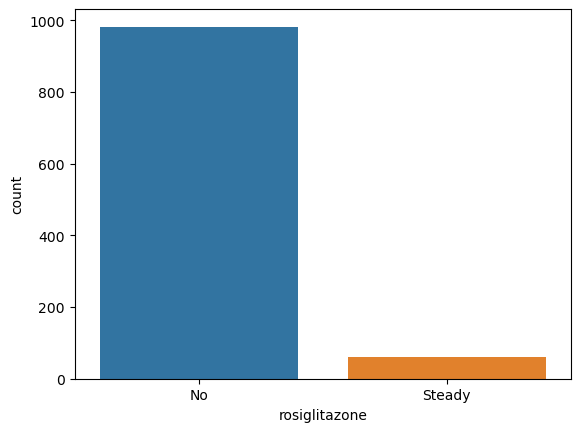

acarbose
AxesSubplot(0.125,0.11;0.775x0.77)


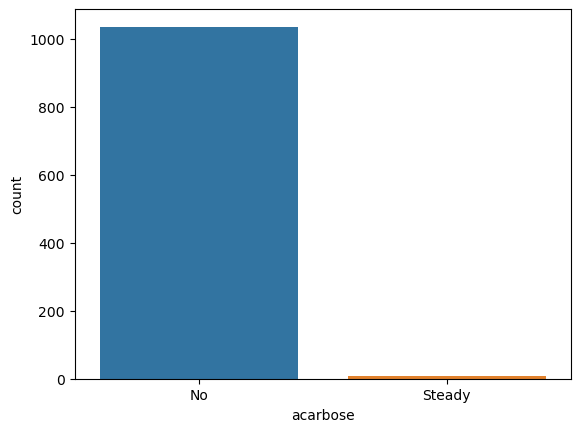

miglitol
AxesSubplot(0.125,0.11;0.775x0.77)


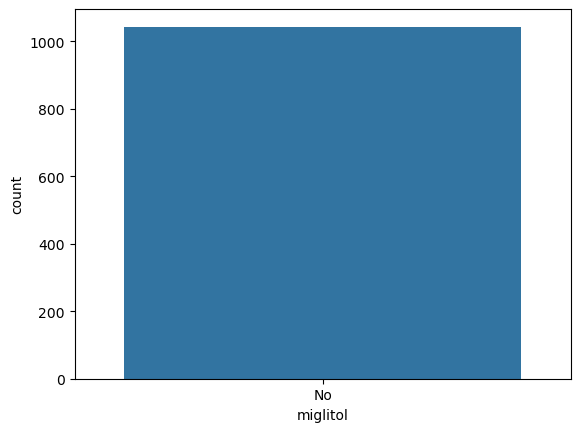

troglitazone
AxesSubplot(0.125,0.11;0.775x0.77)


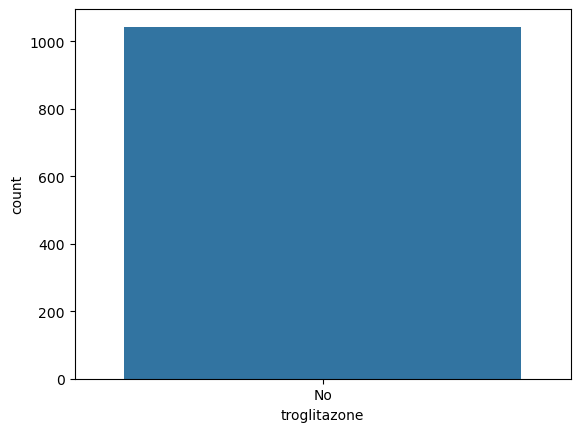

tolazamide
AxesSubplot(0.125,0.11;0.775x0.77)


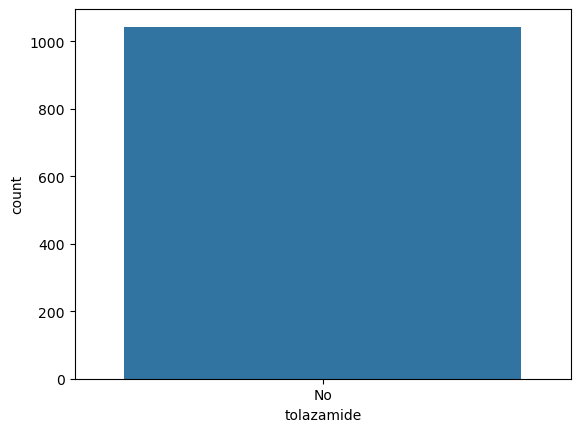

examide
AxesSubplot(0.125,0.11;0.775x0.77)


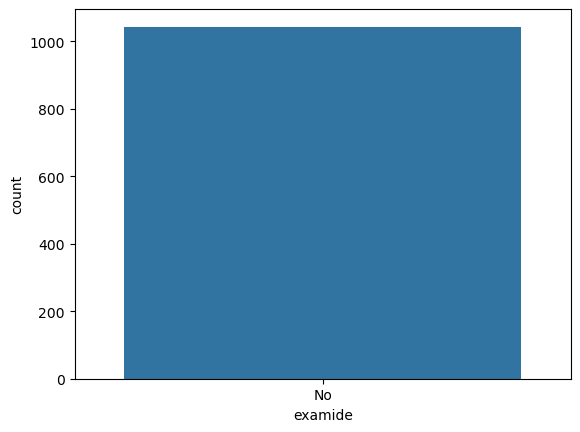

citoglipton
AxesSubplot(0.125,0.11;0.775x0.77)


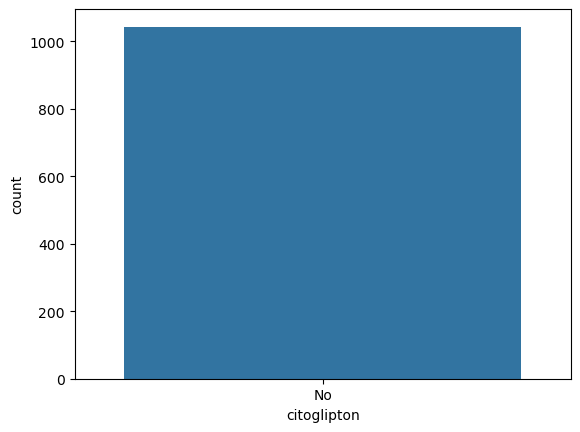

insulin
AxesSubplot(0.125,0.11;0.775x0.77)


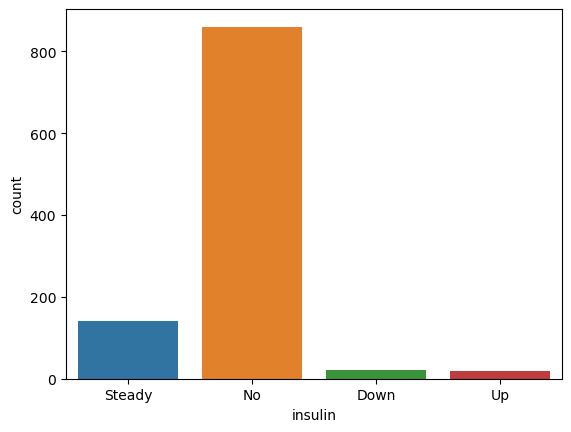

glyburide-metformin
AxesSubplot(0.125,0.11;0.775x0.77)


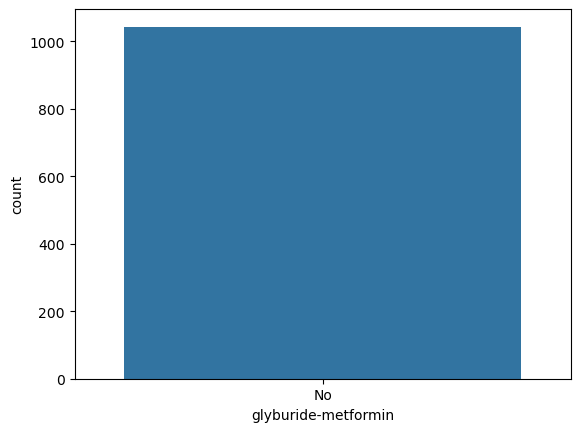

glipizide-metformin
AxesSubplot(0.125,0.11;0.775x0.77)


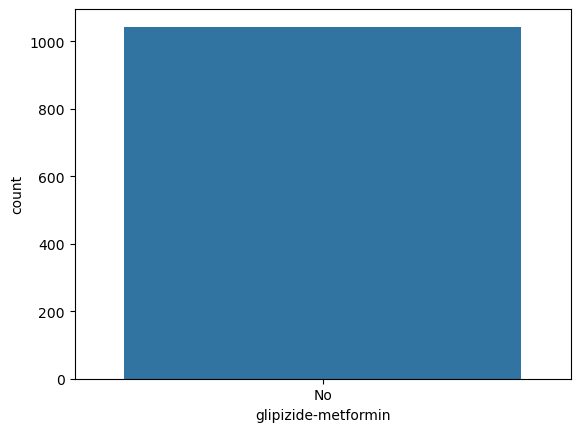

In [67]:
for i in drug:
    print(i)
    print(sns.countplot(df[i]))
    plt.show()

In [68]:
pd.crosstab(df['age'], df['readmitted'])

readmitted,0,1
age,,
5,1,0
15,0,1
25,9,9
35,15,10
45,42,26
55,89,88
65,145,110
75,152,153
85,95,76


In [69]:
df['A1Cresult'].value_counts()

0    935
2     83
1     25
Name: A1Cresult, dtype: int64

In [70]:
df['insulin']

27068     Steady
27128     Steady
27147         No
27186         No
27236         No
           ...  
101238    Steady
101330        No
101340        No
101449        No
101456        No
Name: insulin, Length: 1043, dtype: object

In [71]:
pd.crosstab(df['insulin'], df['readmitted'])

readmitted,0,1
insulin,,
Down,8,14
No,471,389
Steady,75,66
Up,11,9


In [72]:
pd.crosstab(df['diabetesMed'], df['readmitted'])

readmitted,0,1
diabetesMed,,
0,206,170
1,359,308


In [73]:
pd.crosstab(df['A1Cresult'], df['readmitted'])

readmitted,0,1
A1Cresult,,
0,500,435
1,14,11
2,51,32


In [74]:
pd.crosstab(df['A1Cresult'], df['diabetesMed'])

diabetesMed,0,1
A1Cresult,,
0,354,581
1,12,13
2,10,73


In [75]:
pd.crosstab(df['A1Cresult'], df['change'])

change,0,1
A1Cresult,,
0,687,248
1,20,5
2,39,44


In [76]:
df['max_glu_serum'].value_counts()

0    1043
Name: max_glu_serum, dtype: int64

In [77]:
pd.crosstab(df['max_glu_serum'], df['readmitted'])

readmitted,0,1
max_glu_serum,,
0,565,478


In [78]:
pd.crosstab(df['max_glu_serum'], df['A1Cresult'])

A1Cresult,0,1,2
max_glu_serum,,,
0,935,25,83


<AxesSubplot:xlabel='readmitted', ylabel='num_procedures'>

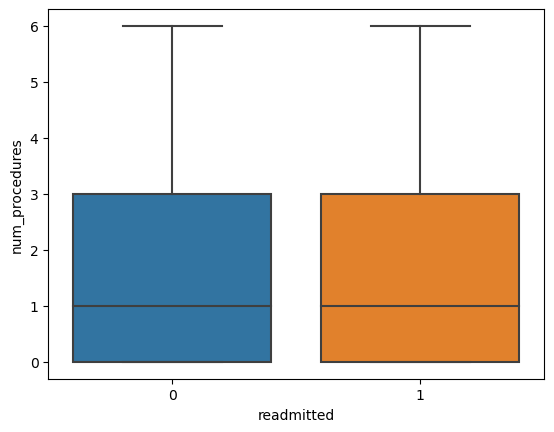

In [79]:
sns.boxplot(df['readmitted'], df['num_procedures'])

<AxesSubplot:xlabel='readmitted', ylabel='num_lab_procedures'>

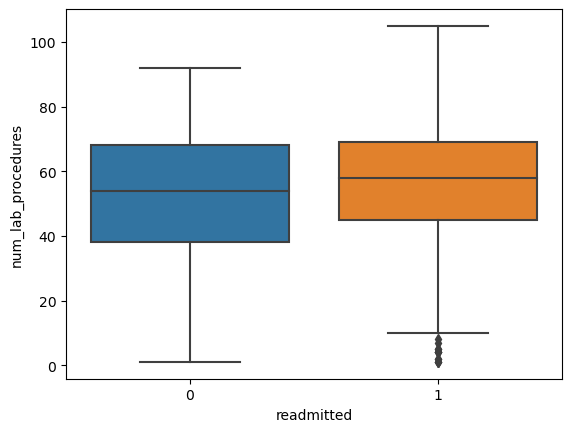

In [80]:
sns.boxplot(df['readmitted'], df['num_lab_procedures'])

<AxesSubplot:xlabel='insulin', ylabel='count'>

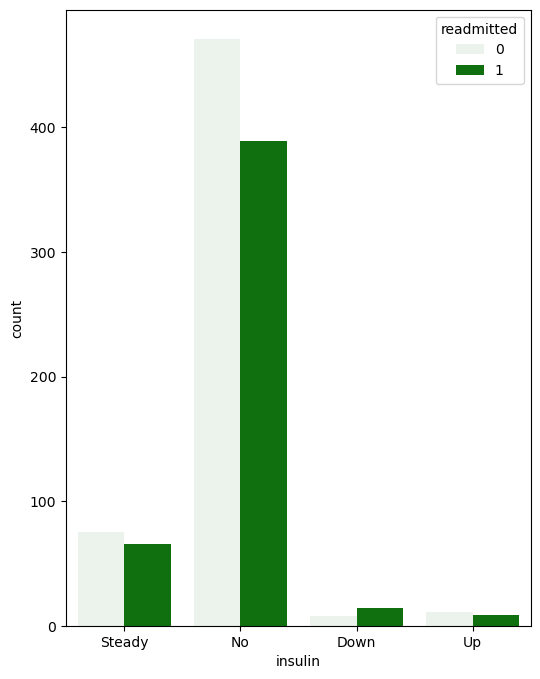

In [81]:
fig=plt.figure(figsize=(6, 8))
sns.countplot(df['insulin'], hue =df['readmitted'], color='green')

<AxesSubplot:xlabel='change', ylabel='count'>

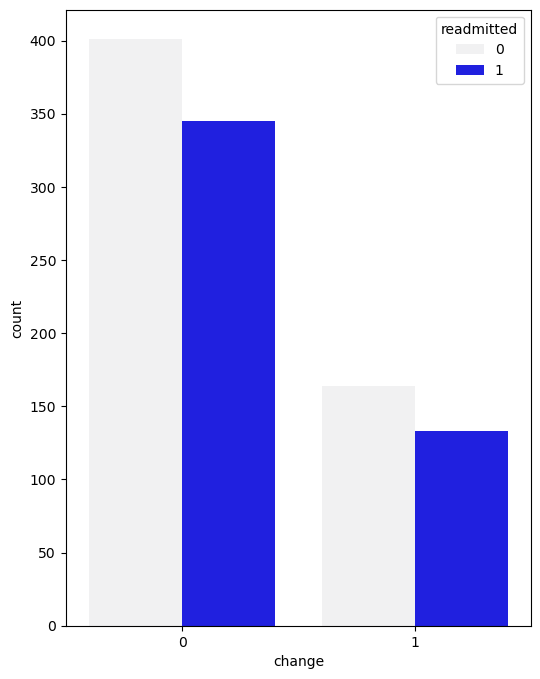

In [82]:
fig=plt.figure(figsize=(6, 8))
sns.countplot(df['change'], hue =df['readmitted'], color='blue')

<AxesSubplot:xlabel='diabetesMed', ylabel='count'>

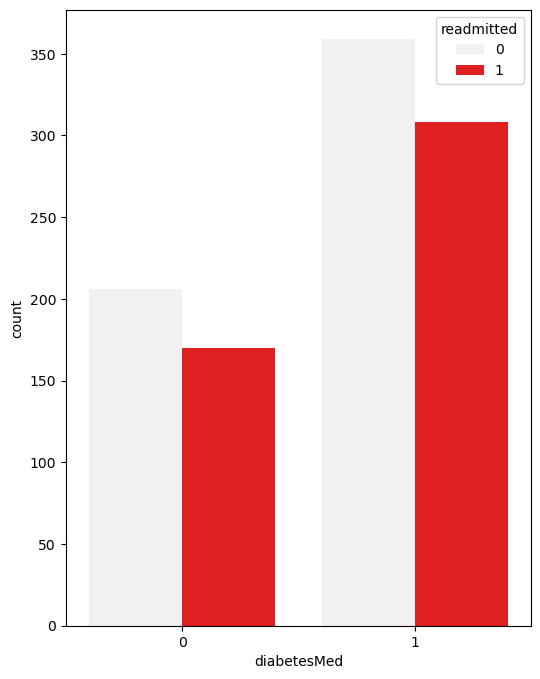

In [83]:
fig=plt.figure(figsize=(6, 8))
sns.countplot(df['diabetesMed'], hue =df['readmitted'], color='red')

In [84]:
df.isnull().sum()

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide

<AxesSubplot:xlabel='A1Cresult', ylabel='count'>

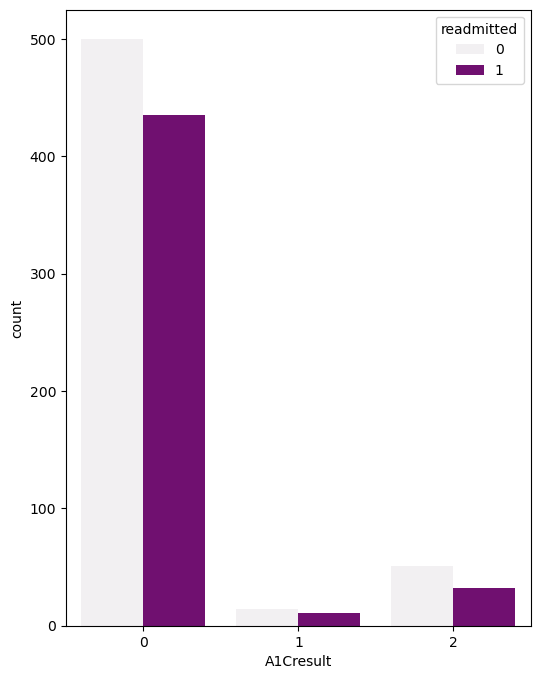

In [85]:
fig=plt.figure(figsize=(6, 8))
sns.countplot(df['A1Cresult'], hue =df['readmitted'], color='purple')

<AxesSubplot:xlabel='max_glu_serum', ylabel='count'>

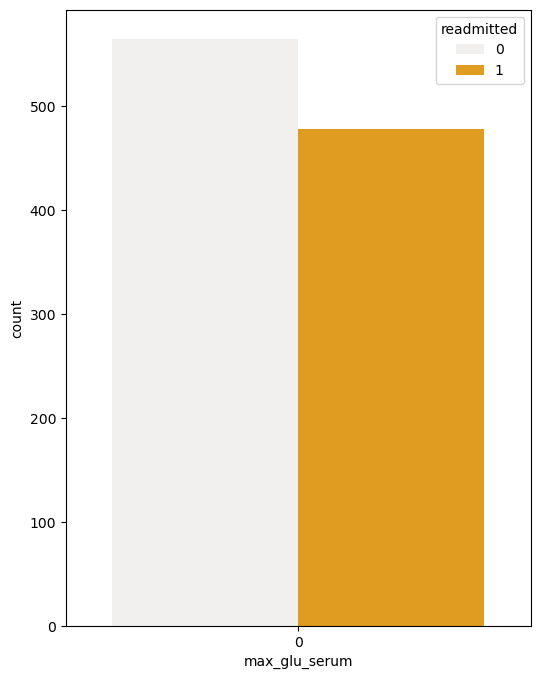

In [86]:
fig=plt.figure(figsize=(6, 8))
sns.countplot(df['max_glu_serum'], hue =df['readmitted'], color='orange')

<AxesSubplot:xlabel='gender', ylabel='count'>

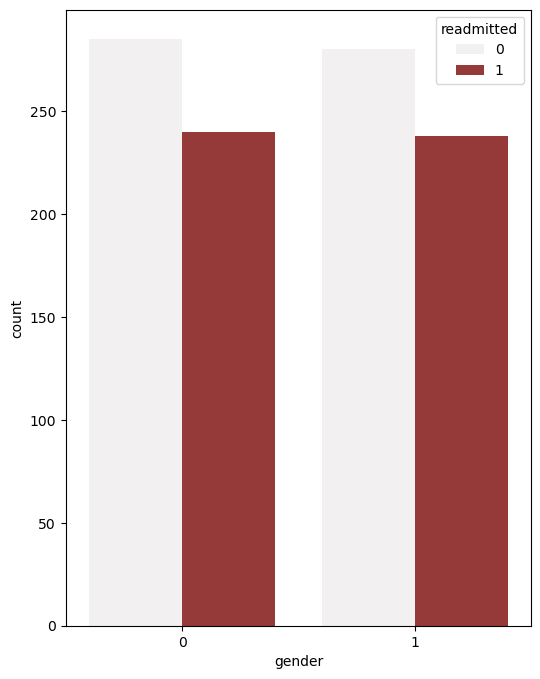

In [87]:
fig=plt.figure(figsize=(6, 8))
sns.countplot(df['gender'], hue =df['readmitted'], color='brown')

<AxesSubplot:xlabel='age', ylabel='count'>

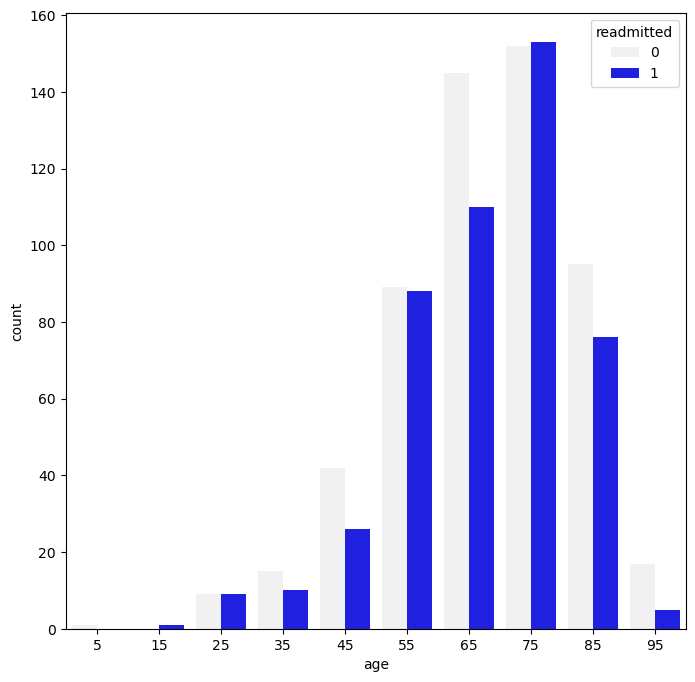

In [88]:
fig=plt.figure(figsize=(8, 8))
sns.countplot(df['age'], hue =df['readmitted'], color='blue')

<AxesSubplot:xlabel='metformin', ylabel='count'>

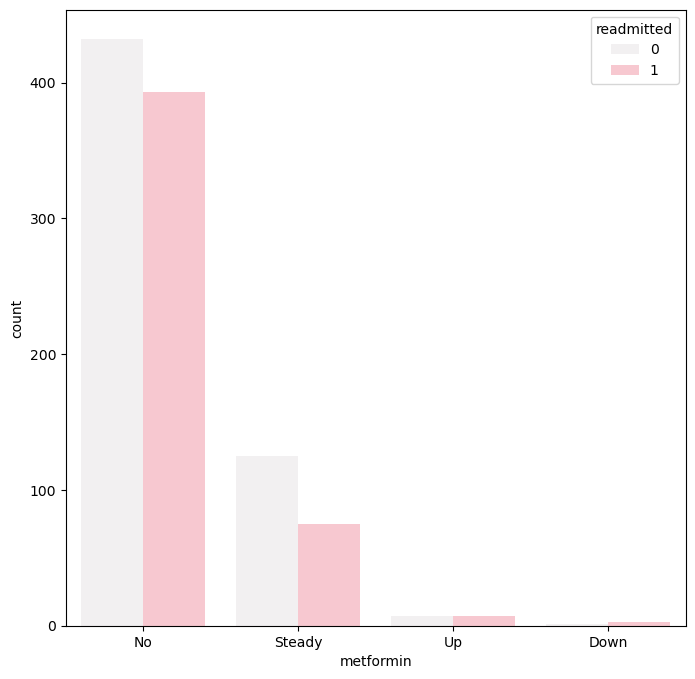

In [89]:
fig=plt.figure(figsize=(8, 8))
sns.countplot(df['metformin'], hue =df['readmitted'], color='pink')

<AxesSubplot:xlabel='num_medications', ylabel='count'>

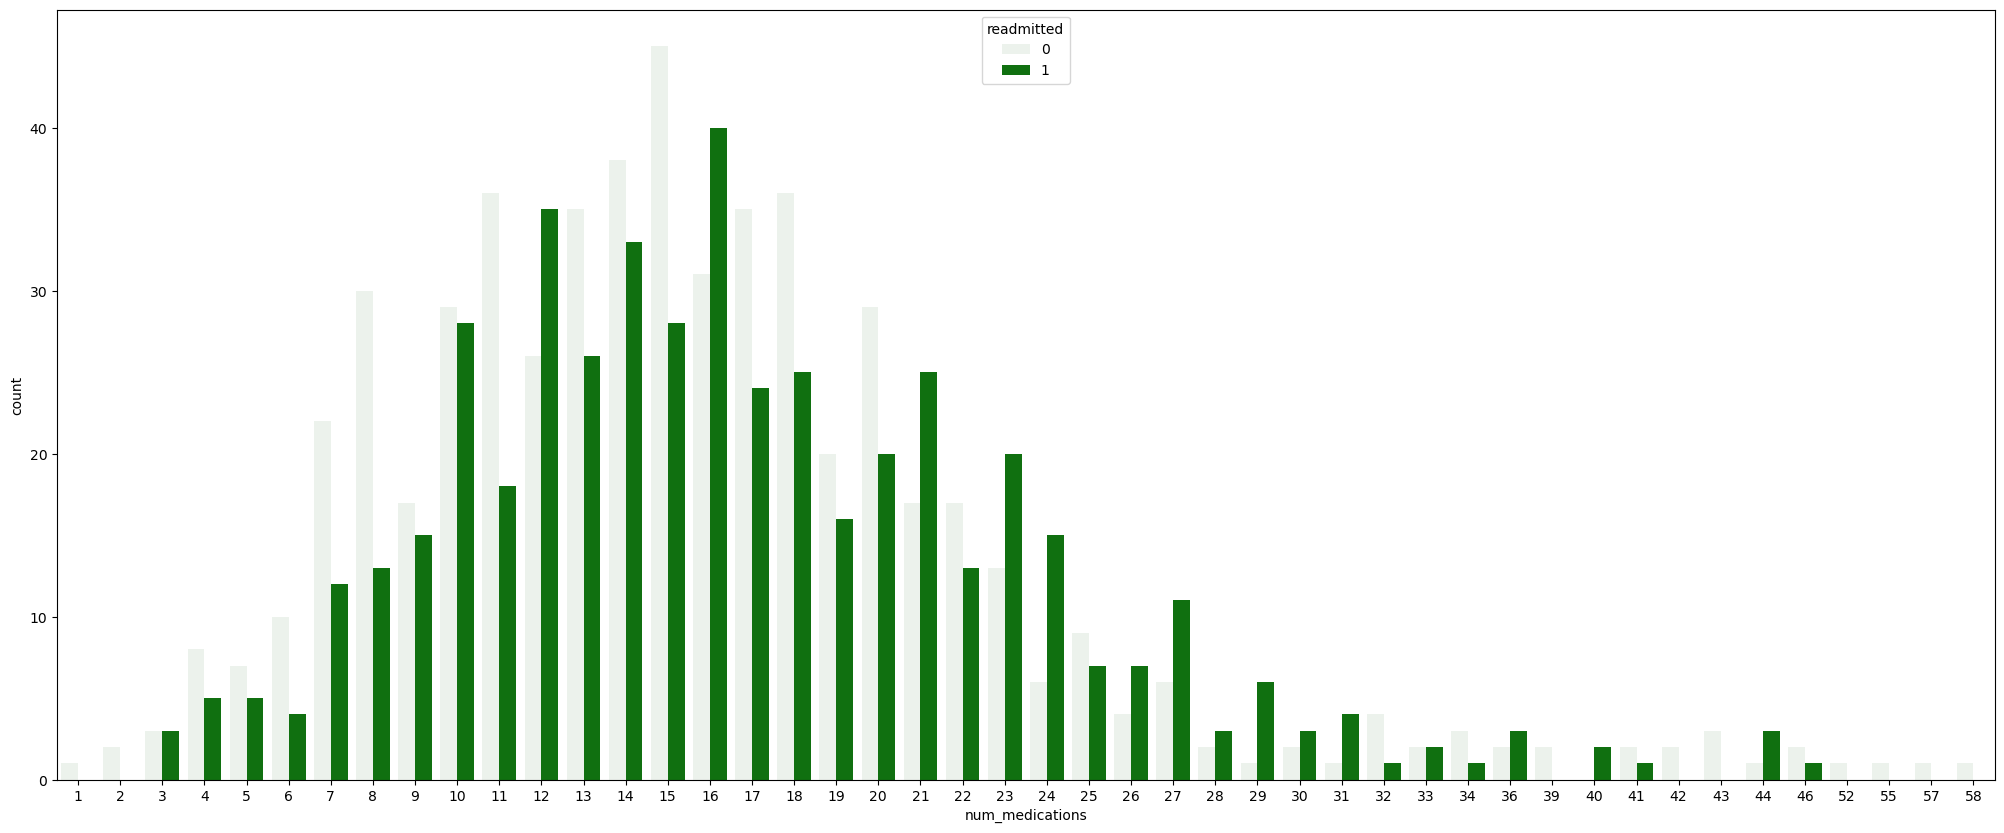

In [90]:
fig=plt.figure(figsize=(25, 10))
sns.countplot(df['num_medications'], hue =df['readmitted'], color='green')

<AxesSubplot:xlabel='num_lab_procedures', ylabel='count'>

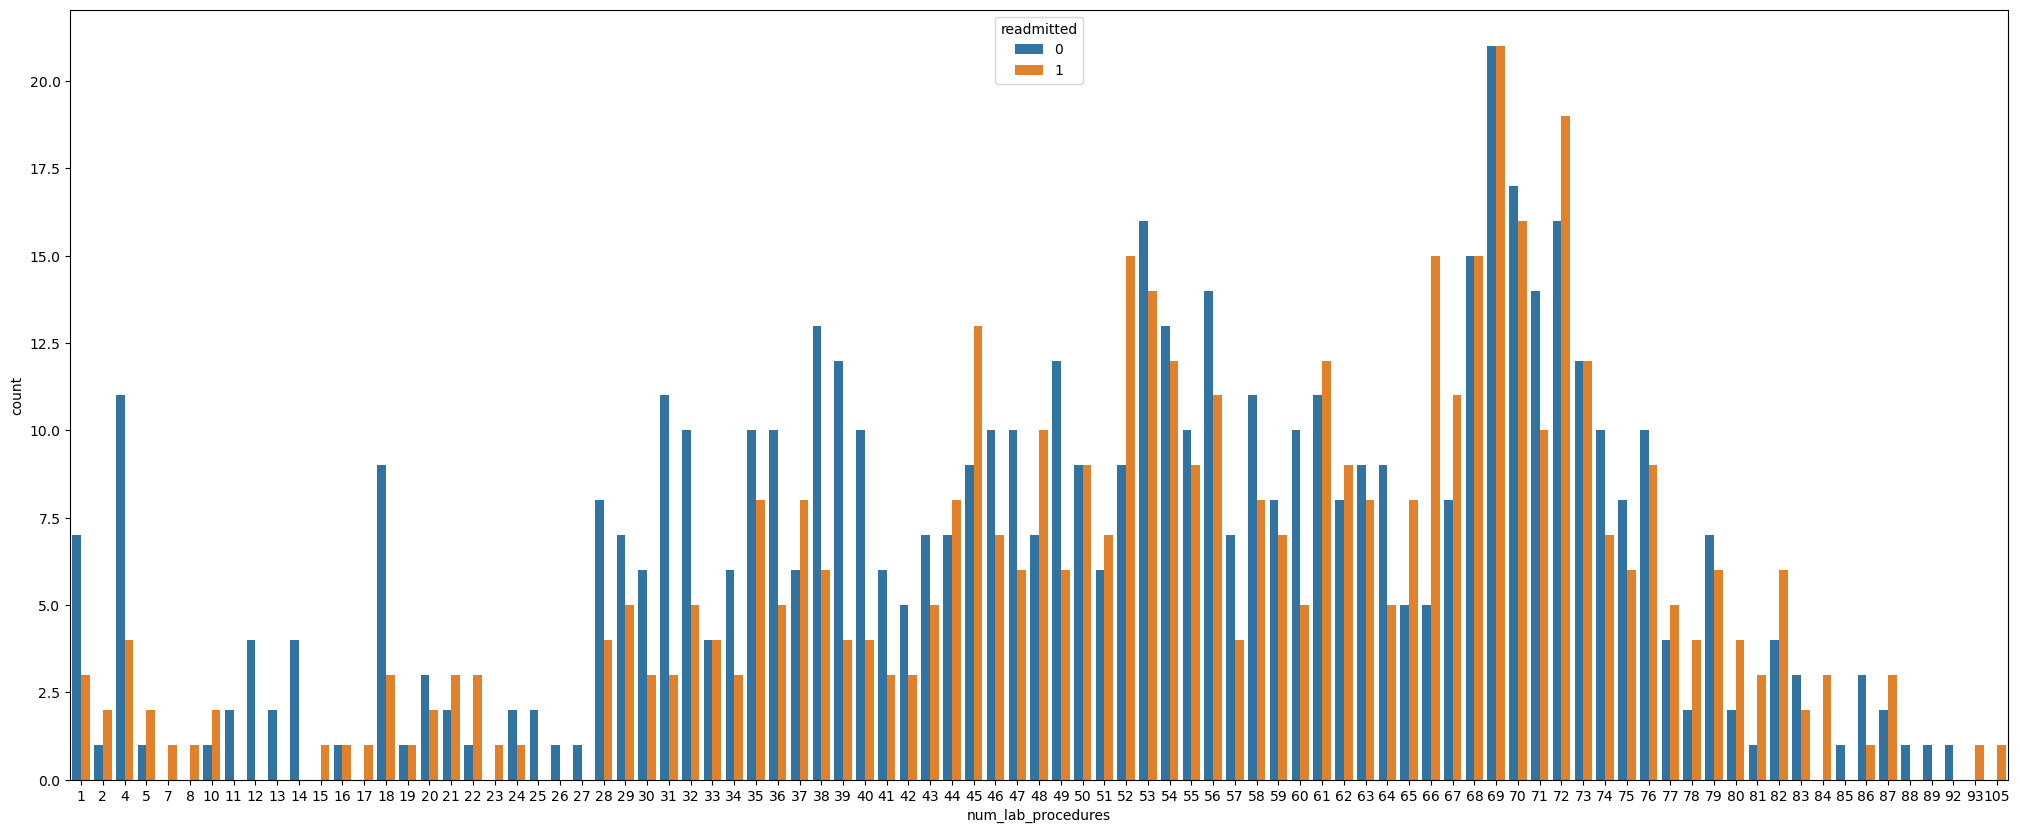

In [91]:
fig=plt.figure(figsize=(25, 10))
sns.countplot(df['num_lab_procedures'], hue =df['readmitted'])

<AxesSubplot:xlabel='num_procedures', ylabel='count'>

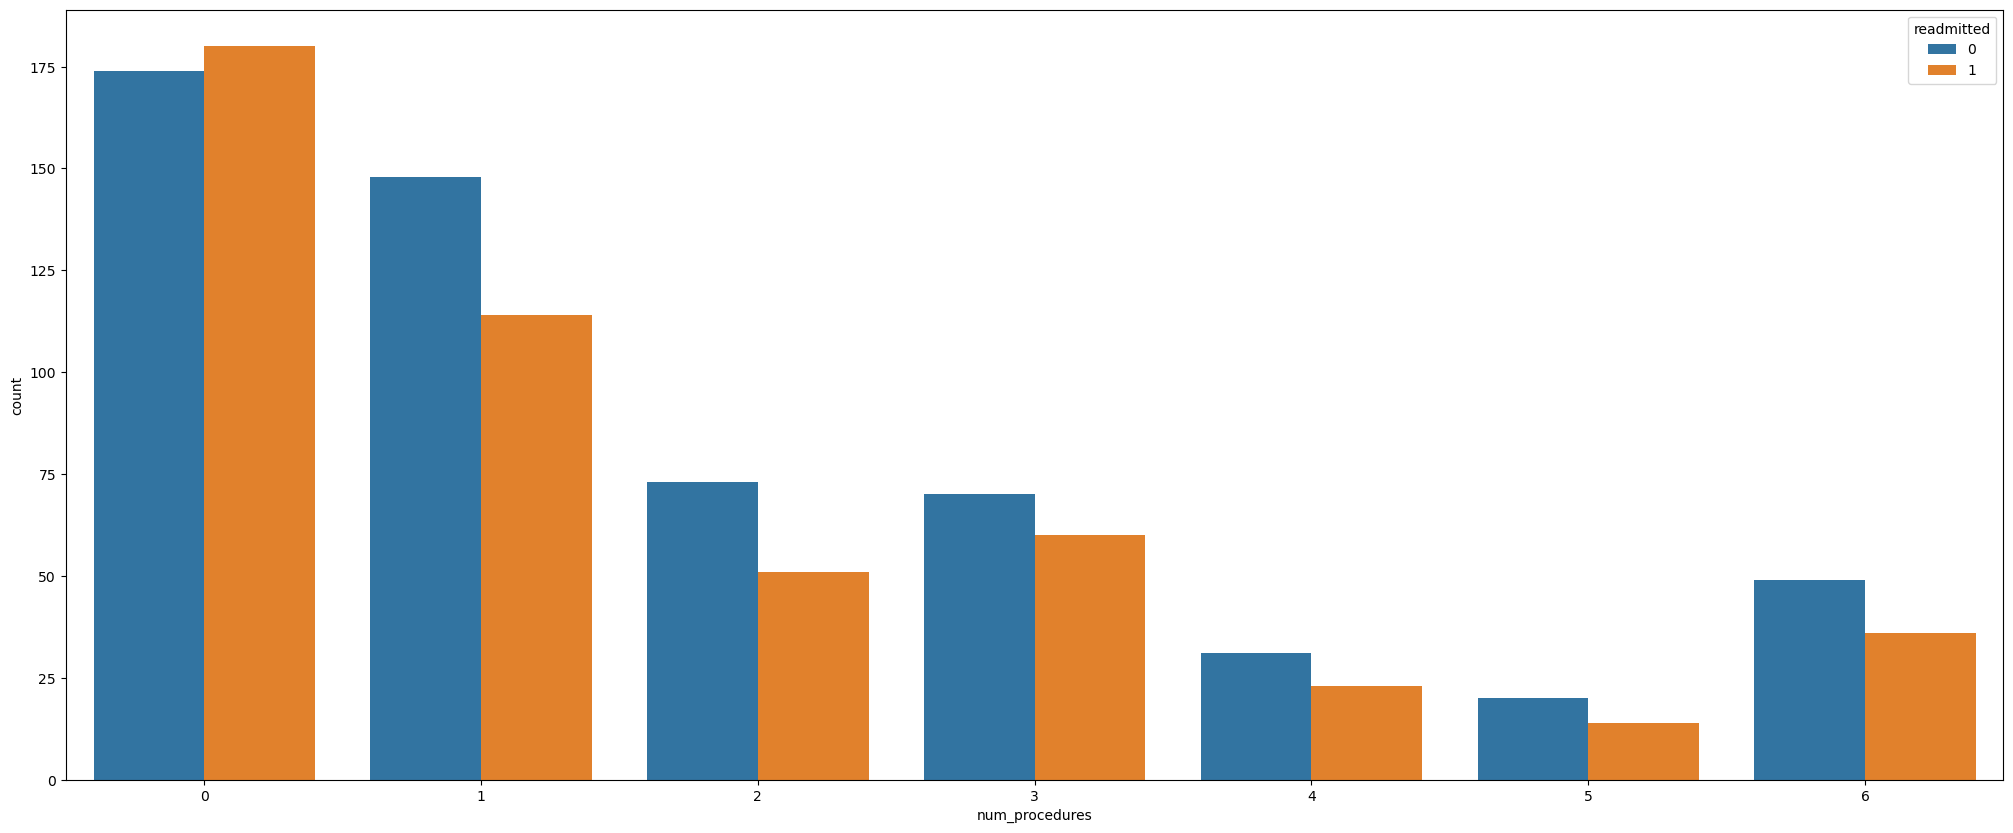

In [92]:
fig=plt.figure(figsize=(25, 10))
sns.countplot(df['num_procedures'], hue =df['readmitted'])

In [93]:
df['citoglipton'].value_counts()

No    1043
Name: citoglipton, dtype: int64

In [94]:
df['examide'].value_counts()

No    1043
Name: examide, dtype: int64

In [95]:
df=df.drop(['citoglipton', 'examide'], axis=1)

In [96]:
l1=['metformin', 'glipizide', 'insulin', 'glyburide']

metformin
AxesSubplot(0.125,0.11;0.775x0.77)


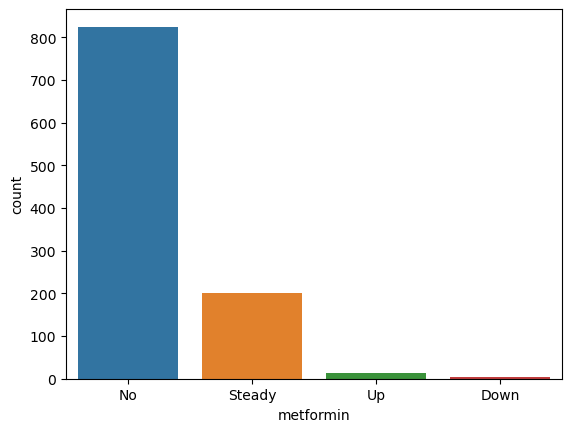

glipizide
AxesSubplot(0.125,0.11;0.775x0.77)


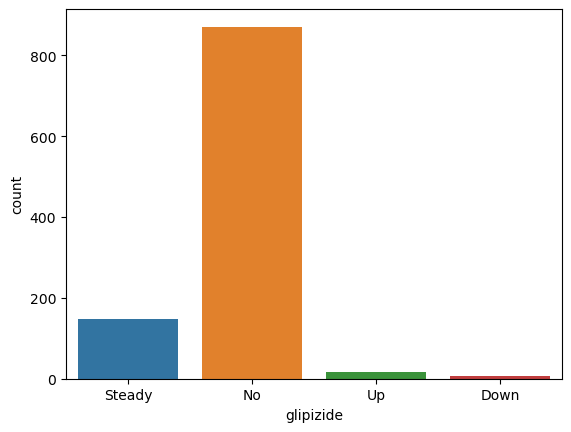

insulin
AxesSubplot(0.125,0.11;0.775x0.77)


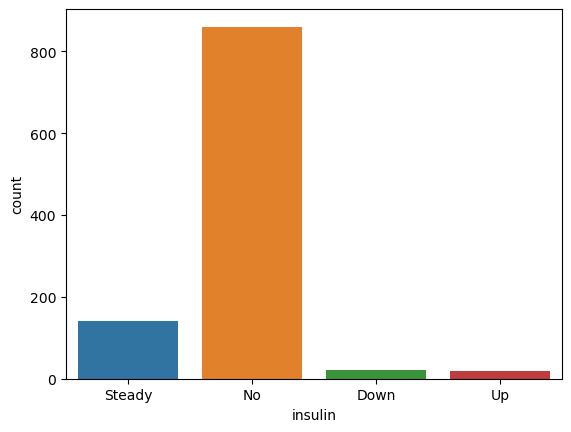

glyburide
AxesSubplot(0.125,0.11;0.775x0.77)


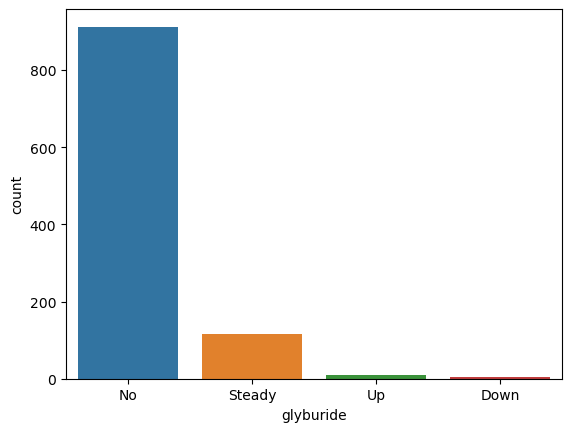

In [97]:
for i in l1:
    print(i)
    print(sns.countplot(df[i]))
    plt.show()

In [98]:
for i in l1:
    print(i)
    print((df[i].value_counts(normalize=True)*100))

metformin
No        79.098754
Steady    19.175455
Up         1.342282
Down       0.383509
Name: metformin, dtype: float64
glipizide
No        83.509108
Steady    14.189837
Up         1.629914
Down       0.671141
Name: glipizide, dtype: float64
insulin
No        82.454458
Steady    13.518696
Down       2.109300
Up         1.917546
Name: insulin, dtype: float64
glyburide
No        87.440077
Steady    11.217641
Up         0.862895
Down       0.479386
Name: glyburide, dtype: float64


In [99]:
for i in l1:
    df[i]=df[i].apply(lambda x:0 if (x=='No' or x== 'Steady') else 1)

In [100]:
df.insulin.value_counts()

0    1001
1      42
Name: insulin, dtype: int64

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1043 entries, 27068 to 101456
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      1043 non-null   object
 1   gender                    1043 non-null   int64 
 2   age                       1043 non-null   int64 
 3   admission_type_id         1043 non-null   int64 
 4   discharge_disposition_id  1043 non-null   int64 
 5   admission_source_id       1043 non-null   int64 
 6   time_in_hospital          1043 non-null   int64 
 7   num_lab_procedures        1043 non-null   int64 
 8   num_procedures            1043 non-null   int64 
 9   num_medications           1043 non-null   int64 
 10  number_outpatient         1043 non-null   int64 
 11  number_emergency          1043 non-null   int64 
 12  number_inpatient          1043 non-null   int64 
 13  diag_1                    1043 non-null   object
 14  diag_2            

In [102]:



# Calculate the class distribution
class_counts = df['readmitted'].value_counts()
class_proportions = class_counts / len(df)

# Print the class distribution
print("Class counts:")
print(class_counts)
print("\nClass proportions:")
print(class_proportions)

Class counts:
0    565
1    478
Name: readmitted, dtype: int64

Class proportions:
0    0.541707
1    0.458293
Name: readmitted, dtype: float64


<AxesSubplot:xlabel='count', ylabel='race'>

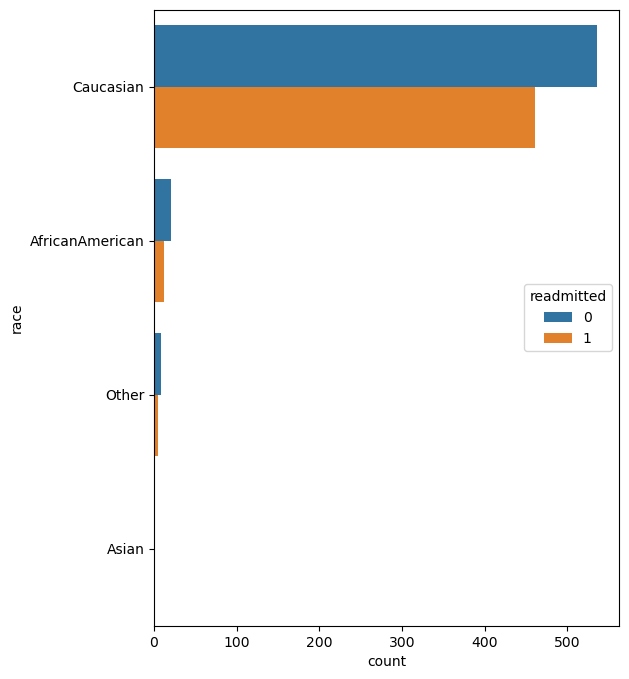

In [103]:
fig=plt.figure(figsize=(6, 8))
sns.countplot(y= df['race'], hue = df['readmitted'])

Text(0.5, 1.0, 'Gender of Patient vs Readmission')

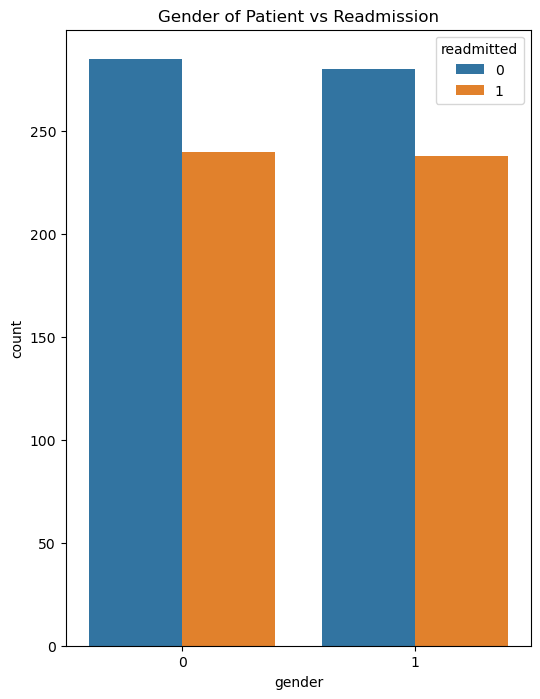

In [104]:
fig=plt.figure(figsize=(6, 8))
sns.countplot(df['gender'], hue = df['readmitted']).set_title('Gender of Patient vs Readmission')

<AxesSubplot:xlabel='readmitted', ylabel='count'>

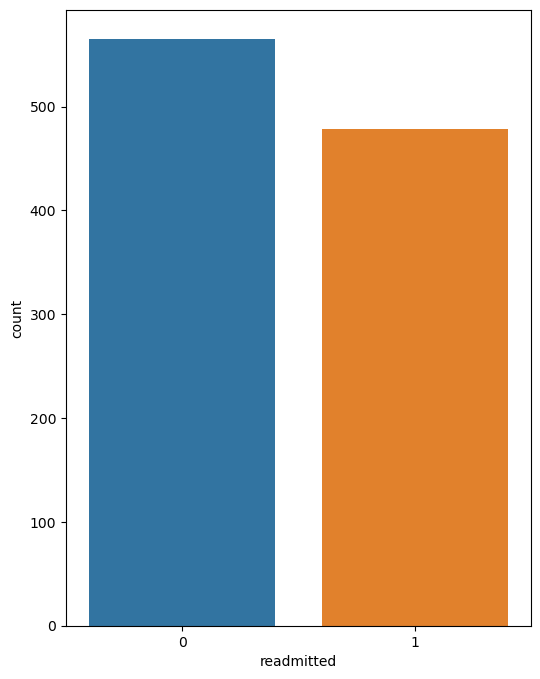

In [105]:
fig=plt.figure(figsize=(6, 8))
sns.countplot(df['readmitted'])

In [106]:

# Calculate the Pearson correlation matrix
correlation_matrix = df.corr(method='pearson')

# Print the correlation matrix
print(correlation_matrix)

                            gender       age  admission_type_id  \
gender                    1.000000 -0.068306           0.020858   
age                      -0.068306  1.000000           0.040754   
admission_type_id         0.020858  0.040754           1.000000   
discharge_disposition_id -0.079584  0.158877           0.066728   
admission_source_id      -0.005649 -0.038857          -0.870631   
time_in_hospital         -0.051999  0.142035          -0.169123   
num_lab_procedures        0.012503  0.061504          -0.582846   
num_procedures            0.096925 -0.036121           0.266260   
num_medications          -0.032610  0.068524           0.072790   
number_outpatient        -0.040566 -0.057562           0.014181   
number_emergency          0.003504 -0.210287          -0.176882   
number_inpatient          0.047898 -0.110145          -0.075550   
number_diagnoses         -0.002261  0.178331          -0.161884   
max_glu_serum                  NaN       NaN                Na

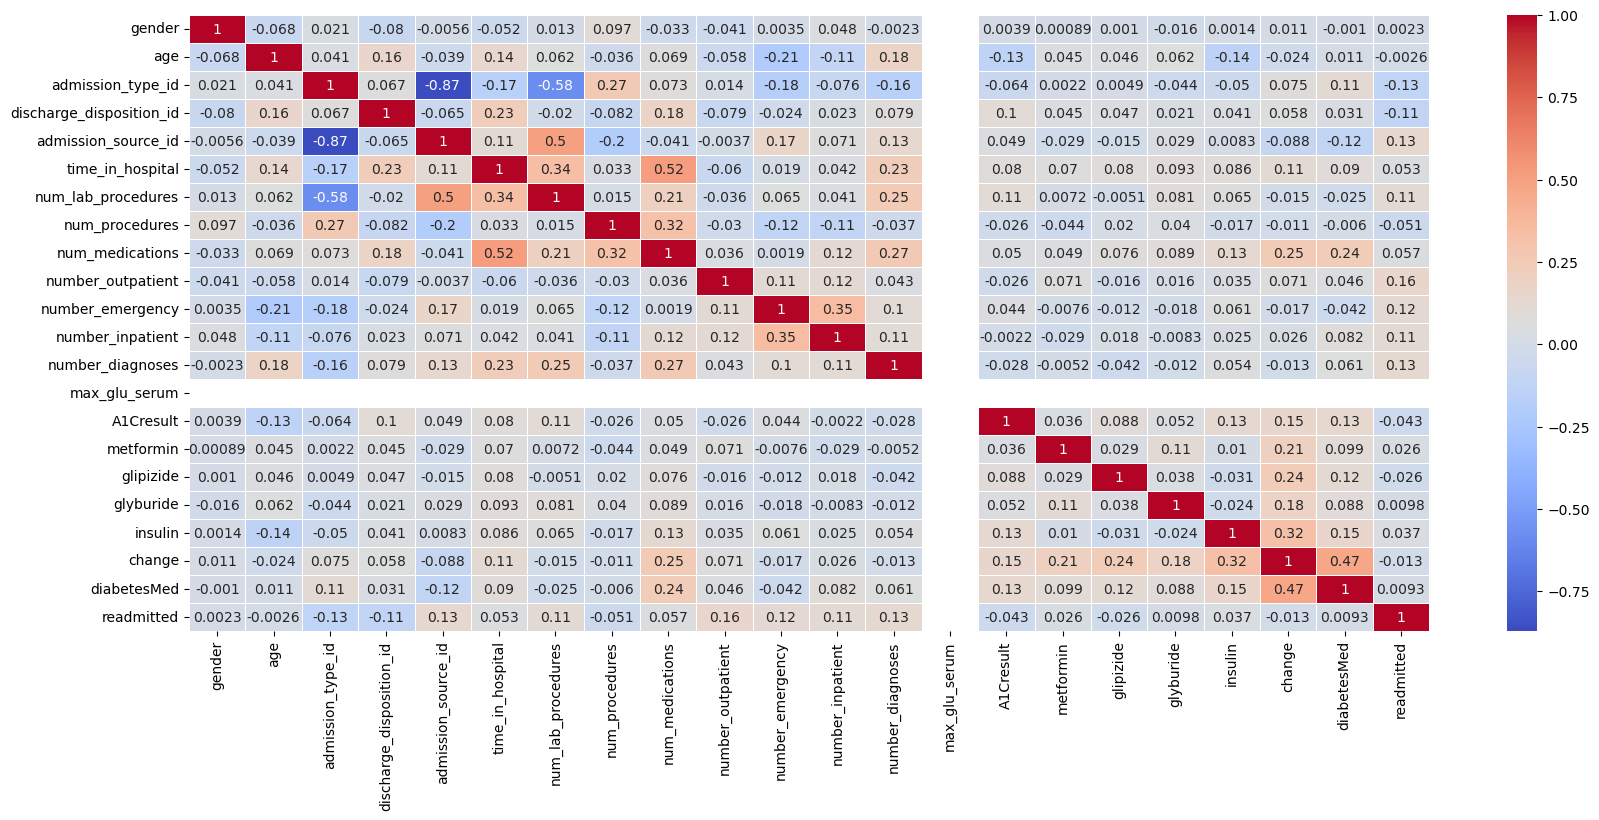

In [107]:
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

# Show the plot
plt.show()

<AxesSubplot:xlabel='age', ylabel='count'>

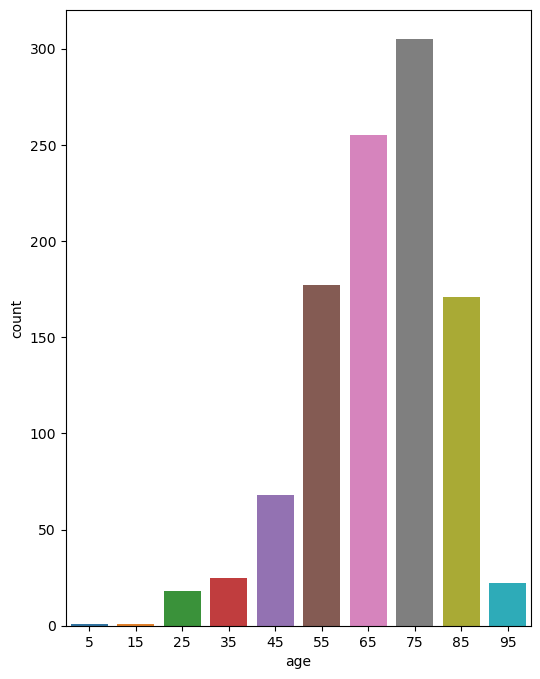

In [108]:
fig=plt.figure(figsize=(6, 8))
sns.countplot(df['age'])

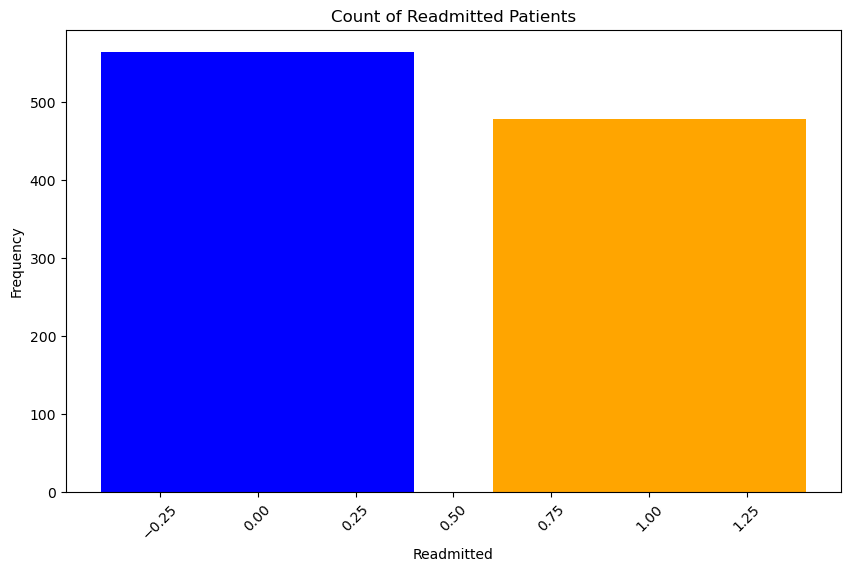

In [109]:
df1 = df['readmitted'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
colors = ['blue', 'orange', 'green', 'red', 'purple']
plt.bar(df1.index, df1.values, color=colors)

plt.title('Count of Readmitted Patients')
plt.xlabel('Readmitted')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Display the bar chart
plt.show()

In [110]:
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
27068,Caucasian,0,75,3,3,1,10,65,1,28,1,1,3,715,402,428,9,0,0,0,No,No,No,No,No,0,0,No,No,No,No,No,No,No,0,No,No,No,No,No,1,1,0
27128,Caucasian,1,85,1,11,5,6,73,0,16,0,0,0,250.2,780,403,9,0,0,0,No,No,No,No,No,0,0,No,No,No,No,No,No,No,0,No,No,No,No,No,0,1,0
27147,Caucasian,1,65,1,1,7,2,58,3,12,0,0,0,414,411,401,9,0,0,0,No,No,No,No,No,0,0,No,Steady,No,No,No,No,No,0,No,No,No,No,No,0,1,1
27186,Caucasian,1,45,1,3,7,3,33,0,7,4,3,6,296,303,70,9,0,0,0,No,No,No,No,No,0,0,No,Steady,No,No,No,No,No,0,No,No,No,No,No,0,1,1
27236,Caucasian,1,55,3,1,1,2,5,4,11,0,0,0,196,199,250,7,0,0,0,No,No,No,No,No,0,0,No,No,No,No,No,No,No,0,No,No,No,No,No,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101238,AfricanAmerican,1,75,1,1,7,1,69,1,20,0,0,0,584,403,438,9,0,0,0,No,No,No,No,No,0,0,No,No,No,No,No,No,No,0,No,No,No,No,No,0,1,0
101330,Caucasian,1,35,1,1,7,4,49,1,7,0,0,0,250.8,707,682,6,0,1,0,No,No,No,No,No,0,0,No,No,No,No,No,No,No,0,No,No,No,No,No,0,0,0
101340,Caucasian,1,65,1,1,7,3,48,0,11,0,0,1,435,250,414,7,0,0,0,No,No,No,No,No,0,0,No,No,No,No,No,No,No,0,No,No,No,No,No,0,1,0
101449,Caucasian,0,75,1,3,7,13,82,1,22,7,0,0,486,511,276,9,0,0,0,No,No,No,No,No,0,1,No,No,No,No,No,No,No,0,No,No,No,No,No,1,1,0


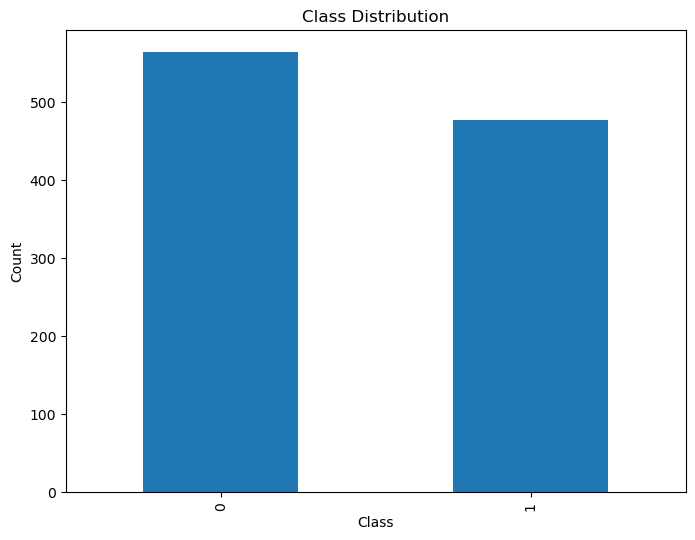

In [111]:
import matplotlib.pyplot as plt

# Create a bar chart of the class distribution
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar')

plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')


plt.show()

In [112]:
from sklearn.preprocessing import LabelEncoder

df=pd.DataFrame(df)

# Create a LabelEncoder instance
le = LabelEncoder()

# Apply LabelEncoder to each categorical column in the DataFrame
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

In [113]:
print(df.head())

       race  gender  age  admission_type_id  discharge_disposition_id  \
27068     2       0   75                  3                         3   
27128     2       1   85                  1                        11   
27147     2       1   65                  1                         1   
27186     2       1   45                  1                         3   
27236     2       1   55                  3                         1   

       admission_source_id  time_in_hospital  num_lab_procedures  \
27068                    1                10                  65   
27128                    5                 6                  73   
27147                    7                 2                  58   
27186                    7                 3                  33   
27236                    1                 2                   5   

       num_procedures  num_medications  number_outpatient  number_emergency  \
27068               1               28                  1                

In [114]:
print(df.columns)

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


Decision Tree Accuracy: 0.57
Decision Tree Confusion Matrix:
[[77 47]
 [42 43]]
Decision Tree Precision: 0.56
Decision Tree Recall: 0.56
Decision Tree F1-score: 0.56
----------------------------------------------------------------------------------------------------
Random Forest Accuracy: 0.59
Random Forest Confusion Matrix:
[[82 42]
 [44 41]]
Random Forest Precision: 0.57
Random Forest Recall: 0.57
Random Forest F1-score: 0.57
----------------------------------------------------------------------------------------------------
Logistic Regression Accuracy: 0.57
Logistic Regression Confusion Matrix:
[[84 40]
 [49 36]]
Logistic Regression Precision: 0.55
Logistic Regression Recall: 0.55
Logistic Regression F1-score: 0.55
----------------------------------------------------------------------------------------------------
MLP Classifier Accuracy: 0.55
MLP Classifier Confusion Matrix:
[[90 34]
 [60 25]]
MLP Classifier Precision: 0.51
MLP Classifier Recall: 0.51
MLP Classifier F1-score: 0.5

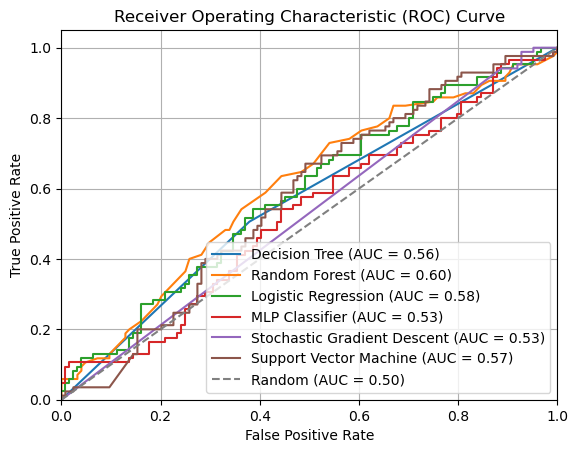

In [115]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt

X = df.drop('readmitted', axis=1)
y = df['readmitted']

df_encoded = pd.get_dummies(df, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifiers = [
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('MLP Classifier', MLPClassifier(max_iter=1000)),
    ('Stochastic Gradient Descent', SGDClassifier(loss='log')),
    ('Support Vector Machine', SVC(probability=True))
]

plt.figure()

for name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(f"{name} Confusion Matrix:\n{cm}")
    print(f"{name} Precision: {report['macro avg']['precision']:.2f}")
    print(f"{name} Recall: {report['macro avg']['recall']:.2f}")
    print(f"{name} F1-score: {report['macro avg']['f1-score']:.2f}")
    print("-" * 100)


    fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')


plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random (AUC = 0.50)')


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)

plt.show()

Decision Tree Accuracy: 0.61
Decision Tree Confusion Matrix:
[[83 41]
 [40 45]]
Decision Tree Precision: 0.60
Decision Tree Recall: 0.60
Decision Tree F1-score: 0.60
Best hyperparameters: {'max_depth': 11}
----------------------------------------------------------------------------------------------------
Random Forest Accuracy: 0.61
Random Forest Confusion Matrix:
[[90 34]
 [47 38]]
Random Forest Precision: 0.59
Random Forest Recall: 0.59
Random Forest F1-score: 0.59
Best hyperparameters: {'max_depth': 7, 'n_estimators': 200}
----------------------------------------------------------------------------------------------------
Logistic Regression Accuracy: 0.57
Logistic Regression Confusion Matrix:
[[84 40]
 [49 36]]
Logistic Regression Precision: 0.55
Logistic Regression Recall: 0.55
Logistic Regression F1-score: 0.55
Best hyperparameters: {'C': 0.008629132190071855}
----------------------------------------------------------------------------------------------------
MLP Classifier Accu

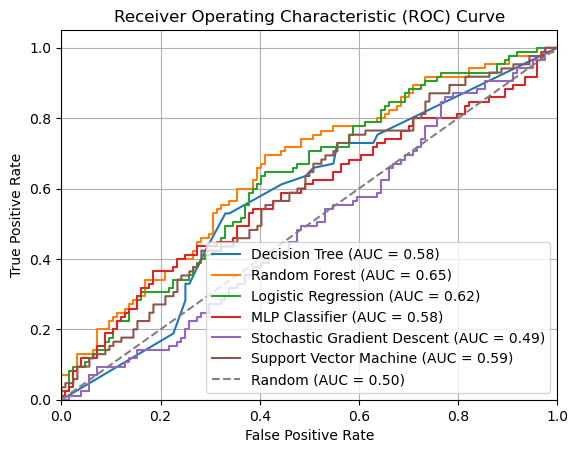

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from scipy.stats import loguniform, randint

df_encoded = pd.get_dummies(df, columns=['race'], drop_first=True)

X = df_encoded.drop('readmitted', axis=1)
y = df_encoded['readmitted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifiers = [
    ('Decision Tree', DecisionTreeClassifier(), {'max_depth': randint(1, 21)}),
    ('Random Forest', RandomForestClassifier(), {'n_estimators': [10, 50, 100, 200], 'max_depth': randint(1, 21)}),
    ('Logistic Regression', LogisticRegression(max_iter=1000), {'C': loguniform(1e-3, 1e3)}),
    ('MLP Classifier', MLPClassifier(max_iter=1000), {'hidden_layer_sizes': [(50,), (100,), (200,)]}),
    ('Stochastic Gradient Descent', SGDClassifier(loss='log'), {'alpha': loguniform(1e-4, 1)}),
    ('Support Vector Machine', SVC(probability=True), {'C': loguniform(1e-3, 1e3), 'kernel': ['linear', 'rbf']})
]

plt.figure()

for name, clf, params in classifiers:
    random_clf = RandomizedSearchCV(clf, param_distributions=params, n_iter=10, scoring='roc_auc', cv=5, random_state=42)
    random_clf.fit(X_train, y_train)
    
    best_clf = random_clf.best_estimator_
    y_pred = best_clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(f"{name} Confusion Matrix:\n{cm}")
    print(f"{name} Precision: {report['macro avg']['precision']:.2f}")
    print(f"{name} Recall: {report['macro avg']['recall']:.2f}")
    print(f"{name} F1-score: {report['macro avg']['f1-score']:.2f}")
    print("Best hyperparameters:", random_clf.best_params_)
    print("-" * 100)

    fpr, tpr, _ = roc_curve(y_test, best_clf.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random (AUC = 0.50)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)

plt.show()
